<div style="text-align: right"> Provided on May 20, Due on June 03 [BRI516, Spring/2020] </div>

For homework in general:
* Install `Anaconda` and create an environment with `NumPy`, `Pandas`, `Matplotlib`, `scikit-learn`,`scipy` in Python 3.5
* Please type the equation and/or text using markdown in jupyter-lab or jupyter-notebook
* Please upload your jupyter-notebook file for homework to `Blackboard` 
* Please discuss your results at least one line of text


## [Hw#3] Regression analysis

The dataset (X) provided has a very high-dimensional sample (i.e., number of dimension = 60,837) while there is a limited available number of samples (n = 80). 

The goal is to predict the target scores (y) from the high-dimensional input, X.
* Note that, as you know, this problem is very prone to the so-called, curse-of-dimensionality.
    * Thus, you would need to put some effort to optimize your model such as using regularizations

 
    

----

### Now, please perform the following to solve this regression problem.

* Please try out at least a few models that you learned in the class and show only the results from your best performing regression model



#### 1. Load all the input sample data X and target values y
 (a) You can use 'loadmat' function after importing 'scipy.io' to load 'dataset.mat' 
 
 (b) Please standardize X before using



In [2]:
# (a)
import scipy.io
import numpy as np
mat = scipy.io.loadmat('dataset.mat')
Y = np.transpose(mat["y"])
X = np.transpose(mat["X"])

In [3]:
# (b)
from sklearn.preprocessing import StandardScaler
import numpy as np


sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
print("<Before preprocessing>")
print("mean : {}, std : {}".format(np.mean(mat["X"]), np.std(mat["X"])))
print("<After preprocessing>")
print("mean : {}, std : {}".format(np.mean(X_std), np.std(X_std)))

# 평균이 0, 표준편차가 1이 되도록 변환되었음.

<Before preprocessing>
mean : 0.11365045829970055, std : 0.46106094040209705
<After preprocessing>
mean : -2.0650195923607992e-18, std : 1.0000000000000002


#### 2. Perform the regression analysis based on the nested k-fold cross-validation (k=5) 
 
 (a) Please evaluate the performance from the training, validation, and test data by the correlation of true and predicted values 

 (b) Please optimize the potential hyperparameter(s) of your model to get a best performance


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([
        ('reduce_dim', PCA()),
        ('regressor', SGDRegressor(max_iter=100, verbose=1, penalty="l1"))
        ])

param_grid=[
        {
            "reduce_dim__n_components": range(1,11),
            "regressor__alpha": [1e-5,1e-4,1e-3,1e-2,1e-1], 
            "regressor__l1_ratio": [0.001,0.25,0.5,0.75,0.999]
        } 
    ]

gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring="r2",cv=5, n_jobs=-1)
gs = gs.fit(X_std, Y)


-- Epoch 1
Norm: 445386762245.77, NNZs: 1, Bias: 16765136610.075619, T: 80, Avg. loss: 284891772564828566807642112.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 178526456378.09, NNZs: 1, Bias: -11978742752.505222, T: 160, Avg. loss: 339102485419270725879988224.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 171849092690.06, NNZs: 1, Bias: -19230823798.235909, T: 240, Avg. loss: 191904308836995724807766016.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 13673534825.01, NNZs: 1, Bias: 19112869561.506561, T: 320, Avg. loss: 163926981577044725115912192.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 176073261480.92, NNZs: 1, Bias: 44219117336.061546, T: 400, Avg. loss: 122787857408219317773795328.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 208102796148.32, NNZs: 1, Bias: 72631771558.075928, T: 480, Avg. loss: 165786837085032378481508352.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 63912193563.81, NNZs: 1, Bias: 4466

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 24798214.41, NNZs: 1, Bias: -387181.508429, T: 6, Avg. loss: 180592300693853.218750
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 104501065997.60, NNZs: 1, Bias: -5419087917.746258, T: 12, Avg. loss: 494990567992537979610464256.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1289858601889.85, NNZs: 1, Bias: -524903693.649510, T: 18, Avg. loss: 375939148532636782082129920.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 47497272148.24, NNZs: 1, Bias: -75493026.168237, T: 24, Avg. loss: 7128424204403546756430692352.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 527403161124.62, NNZs: 1, Bias: -13891827396.004040, T: 30, Avg. loss: 1605797137755819698684952576.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 650046180575.41, NNZs: 1, Bias: -11191261004.243389, T: 36, Avg. loss: 2341266997250899183992307712.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
-- Epoch 1
Norm: 439180832147.91

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 353151080189.60, NNZs: 1, Bias: -13068699276.182453, T: 19, Avg. loss: 310080431983311539486588928.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 26035691196.94, NNZs: 1, Bias: -16506534996.481581, T: 38, Avg. loss: 826676303398298926964539392.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 56769918801.85, NNZs: 1, Bias: -27608818226.454735, T: 57, Avg. loss: 512053937371257347732668416.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 320805086374.53, NNZs: 1, Bias: -37563006709.898705, T: 76, Avg. loss: 333748307912397414790594560.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 155552465693.11, NNZs: 1, Bias: -57270076526.084824, T: 95, Avg. loss: 478365967729110013236477952.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 33602150809.91, NNZs: 1, Bias: -53048719175.123985, T: 114, Avg. loss: 505237419411435478704979968.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
-- Epoch 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 866440366782.81, NNZs: 1, Bias: 48446050475.076675, T: 32, Avg. loss: 113050719962811251139018752.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 21887387911.24, NNZs: 1, Bias: 62838667458.723129, T: 64, Avg. loss: 496159752637204058509148160.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 277309760498.54, NNZs: 1, Bias: 64052449567.580879, T: 96, Avg. loss: 252184192933812407803838464.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 177380888851.49, NNZs: 1, Bias: 74335038667.902298, T: 128, Avg. loss: 144221994884115497310224384.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 122112077250.35, NNZs: 1, Bias: 52451685705.513588, T: 160, Avg. loss: 152108711943545132794511360.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 83251255628.99, NNZs: 1, Bias: 54440500614.024666, T: 192, Avg. loss: 199351474293512016293265408.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
-- Epoch 1
N

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 680045851067.24, NNZs: 1, Bias: -17567987060.094231, T: 44, Avg. loss: 1185623630323629990652936192.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 100314898445.15, NNZs: 1, Bias: -15411491951.528584, T: 88, Avg. loss: 644675443186120631032741888.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 20459927006.11, NNZs: 1, Bias: 3039487691.192685, T: 132, Avg. loss: 454103867735025619111510016.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 147385333483.76, NNZs: 1, Bias: 5474852465.456364, T: 176, Avg. loss: 325579586058528442428686336.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 56877755764.70, NNZs: 1, Bias: 23137633477.127522, T: 220, Avg. loss: 238622081812505117363011584.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 243981854387.66, NNZs: 1, Bias: 54595976068.821793, T: 264, Avg. loss: 238008488466437392306274304.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 27901292402.56, NNZs: 1, Bias: 7419764

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 565413971962.98, NNZs: 1, Bias: -12212351524.271542, T: 57, Avg. loss: 427624269285993552535355392.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 117026238974.13, NNZs: 1, Bias: 1309100676.044951, T: 114, Avg. loss: 366228653921288590718926848.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 93273300382.53, NNZs: 1, Bias: 8106452702.237570, T: 171, Avg. loss: 220802702274095918734114816.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 29945481770.89, NNZs: 1, Bias: -29298228232.927258, T: 228, Avg. loss: 206508002498261678727102464.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 420993285675.30, NNZs: 1, Bias: -29153196720.837688, T: 285, Avg. loss: 134125520847077794037891072.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 76083723602.81, NNZs: 1, Bias: -28299062200.897900, T: 342, Avg. loss: 160108864307812972497993728.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 451537604217.02, NNZs: 1, Bias: -8825

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 8276569149.11, NNZs: 1, Bias: -11684208817.050758, T: 64, Avg. loss: 595674820686751296944865280.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 290006930092.68, NNZs: 1, Bias: -22366138969.314667, T: 128, Avg. loss: 382857227028027470761689088.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 57078464062.48, NNZs: 1, Bias: -40421978237.847481, T: 192, Avg. loss: 258357540139873096960049152.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 247918444499.26, NNZs: 1, Bias: -32462944477.391487, T: 256, Avg. loss: 225420048042945020935798784.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 256393331271.03, NNZs: 1, Bias: -67371536782.836815, T: 320, Avg. loss: 167066338723198849286930432.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 386397243730.94, NNZs: 1, Bias: -72112055095.549194, T: 384, Avg. loss: 204229847644257209345376256.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 45687523143.89, NNZs: 1, Bias: -1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 733953786546.31, NNZs: 1, Bias: 25249120497.101822, T: 19, Avg. loss: 2562754762476138909610803200.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 195272105890.38, NNZs: 1, Bias: 42972769467.189804, T: 38, Avg. loss: 1179615989097149360005709824.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 803904944176.56, NNZs: 1, Bias: 33726966810.435436, T: 57, Avg. loss: 628770139006713882331840512.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 155737004040.41, NNZs: 1, Bias: 63029510900.813484, T: 76, Avg. loss: 1037559072991072785788829696.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5688786688.66, NNZs: 1, Bias: 41506008309.799095, T: 95, Avg. loss: 1153413503470096779789205504.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13609531938.89, NNZs: 1, Bias: 34668565969.404701, T: 114, Avg. loss: 1097548337587423747290169344.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 217210870811.39, NNZs: 1, Bias: 342651

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 478898634928.11, NNZs: 1, Bias: -5180391748.376138, T: 32, Avg. loss: 680812650397616008515813376.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 594801222909.56, NNZs: 1, Bias: -26651330702.048531, T: 64, Avg. loss: 436306236630615030191095808.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 74188076747.83, NNZs: 1, Bias: -34318301074.565331, T: 96, Avg. loss: 389162453869938806567731200.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 7916417750.56, NNZs: 1, Bias: -37363008309.556984, T: 128, Avg. loss: 899620421798639591619559424.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 78046437705.84, NNZs: 1, Bias: -44858727206.063065, T: 160, Avg. loss: 446612108002089272568971264.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 31399668707.11, NNZs: 1, Bias: -32678124458.845325, T: 192, Avg. loss: 345183562296432365290913792.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 26284051749.40, NNZs: 1, Bias: -376916

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 961256539749.16, NNZs: 1, Bias: -14843931165.249613, T: 44, Avg. loss: 419055472581996939516575744.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 366466812167.65, NNZs: 1, Bias: -3960954961.942619, T: 88, Avg. loss: 1247317691821697248503267328.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 170520742139.59, NNZs: 1, Bias: -4373650707.360980, T: 132, Avg. loss: 378395148538007828486422528.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 29375782888.37, NNZs: 1, Bias: 5276859238.483467, T: 176, Avg. loss: 370436127577106707245957120.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 189946395839.47, NNZs: 1, Bias: 26978092406.852081, T: 220, Avg. loss: 326368957524985999616114688.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 165631019707.67, NNZs: 1, Bias: -1624140276.237784, T: 264, Avg. loss: 215663828202770151197638656.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 32623415314.67, NNZs: 1, Bias: -12321

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 71405423405.92, NNZs: 1, Bias: 18754191702.927868, T: 57, Avg. loss: 543537668601821532291858432.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 309914047251.37, NNZs: 1, Bias: -11730156758.594454, T: 114, Avg. loss: 505298988387174732737282048.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 114336986408.33, NNZs: 1, Bias: -49085171334.666695, T: 171, Avg. loss: 340549229694129365762179072.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 12522133874.38, NNZs: 1, Bias: -51899769988.006638, T: 228, Avg. loss: 176165425328011565533757440.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 162635084211.06, NNZs: 1, Bias: -77926917565.462952, T: 285, Avg. loss: 177247794363210698495885312.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 63889951605.75, NNZs: 1, Bias: -125391725092.931305, T: 342, Avg. loss: 167337672707587454648975360.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 83209103080.53, NNZs: 1, Bias: -1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 163258176176.40, NNZs: 1, Bias: 23797292992.638748, T: 64, Avg. loss: 405345231873051313337008128.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 196141752325.89, NNZs: 1, Bias: 42103413248.010262, T: 128, Avg. loss: 321887824756583159360913408.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 239788902180.48, NNZs: 1, Bias: 47573755368.088150, T: 192, Avg. loss: 271303051392974173354590208.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 229897425442.29, NNZs: 1, Bias: 27908436553.000549, T: 256, Avg. loss: 236930710262341045908930560.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 100135697621.08, NNZs: 1, Bias: 22817970436.342701, T: 320, Avg. loss: 209702292738503976327053312.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5455144879.33, NNZs: 1, Bias: 29802512161.289268, T: 384, Avg. loss: 169887628616637541651578880.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 16180886385.94, NNZs: 1, Bias: 2391663

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 1556184602500.01, NNZs: 1, Bias: 10492107547.202074, T: 19, Avg. loss: 702104539126032742813270016.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 39405609709.18, NNZs: 1, Bias: -10264445126.935324, T: 38, Avg. loss: 5548659329767504078566326272.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 89644385733.23, NNZs: 1, Bias: -21239899148.711933, T: 57, Avg. loss: 2167178946617907722745544704.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1014192899281.85, NNZs: 1, Bias: -8698899990.848776, T: 76, Avg. loss: 625280929861791149325287424.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 15767064148.17, NNZs: 1, Bias: -30385138501.249714, T: 95, Avg. loss: 2505083481992575389873995776.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 157360450209.59, NNZs: 1, Bias: -16085511155.573545, T: 114, Avg. loss: 966162095346198898968363008.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 792094468103.23, NNZs: 1, Bias: -2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 770794306863.22, NNZs: 1, Bias: -8520377999.958142, T: 32, Avg. loss: 639621453211399213239238656.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 60657887159.07, NNZs: 1, Bias: -24845236877.215439, T: 64, Avg. loss: 675979642968822663534870528.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 123893363714.47, NNZs: 1, Bias: -27960270633.677685, T: 96, Avg. loss: 507837853026795804952625152.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 158110903541.36, NNZs: 1, Bias: -8342439722.054863, T: 128, Avg. loss: 393768564820838117281890304.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 17168741882.91, NNZs: 1, Bias: -2008397323.143593, T: 160, Avg. loss: 385147618179382092016648192.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 125094459246.44, NNZs: 1, Bias: -8186521908.054613, T: 192, Avg. loss: 325606022110969848383143936.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 68846903250.42, NNZs: 1, Bias: -426221

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 155084482242.10, NNZs: 1, Bias: -35329331105.854286, T: 44, Avg. loss: 1136983280779606643632504832.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 104143152877.47, NNZs: 1, Bias: -37868152345.735542, T: 88, Avg. loss: 887644492313343348067794944.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 178822685627.98, NNZs: 1, Bias: -54657186822.132286, T: 132, Avg. loss: 416141091944191395106914304.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 309157984660.10, NNZs: 1, Bias: -41122038712.366737, T: 176, Avg. loss: 431255366225838914691661824.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 270305774523.27, NNZs: 1, Bias: -42476998966.189041, T: 220, Avg. loss: 404679191548803372913000448.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 199059544014.35, NNZs: 1, Bias: -40293021091.593246, T: 264, Avg. loss: 396136079579479856734273536.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 331107340408.26, NNZs: 1, Bias

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 611803592215.22, NNZs: 1, Bias: 61972012576.112755, T: 51, Avg. loss: 480397683296688198792511488.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 310371648437.79, NNZs: 1, Bias: 61894914180.427048, T: 102, Avg. loss: 466386562148161604661805056.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 285683896083.79, NNZs: 1, Bias: 39918719330.331657, T: 153, Avg. loss: 666189580154423172053073920.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6797515849.21, NNZs: 1, Bias: 17576315210.831947, T: 204, Avg. loss: 461490867563356880317186048.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 226939240666.00, NNZs: 1, Bias: 12665254328.424675, T: 255, Avg. loss: 306780014283337274916601856.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 51080802763.79, NNZs: 1, Bias: 48034664604.577744, T: 306, Avg. loss: 269446358384040650668507136.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 380351029737.99, NNZs: 1, Bias: 5186726

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 80766745444.82, NNZs: 1, Bias: -29425306694.880440, T: 57, Avg. loss: 420223293715375217516216320.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 51362914412.38, NNZs: 1, Bias: -37367660027.393669, T: 114, Avg. loss: 431908171277034167386243072.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 40524492905.96, NNZs: 1, Bias: -60954143463.455612, T: 171, Avg. loss: 338790031842250590710136832.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 45993595264.68, NNZs: 1, Bias: -60719194846.136520, T: 228, Avg. loss: 210210872044422293264269312.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 209448761851.33, NNZs: 1, Bias: -50074506369.257164, T: 285, Avg. loss: 219452311989854798436368384.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 107885294067.84, NNZs: 1, Bias: -55038554780.998138, T: 342, Avg. loss: 215001348288690145395212288.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 204557701410.12, NNZs: 1, Bias: -4

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 32161601696.96, NNZs: 1, Bias: -23885324066.334007, T: 64, Avg. loss: 576150520231318044945678336.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 123097585296.64, NNZs: 1, Bias: -67049682300.174866, T: 128, Avg. loss: 484096195914602907411939328.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 341419055262.25, NNZs: 1, Bias: -39405514262.945786, T: 192, Avg. loss: 327154238470510685726965760.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 79166740783.28, NNZs: 1, Bias: -65835108019.688347, T: 256, Avg. loss: 230752659689846392081088512.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 40489897379.29, NNZs: 1, Bias: -69817888971.192963, T: 320, Avg. loss: 199564018356169816420646912.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 277598716926.04, NNZs: 1, Bias: -70817663080.568298, T: 384, Avg. loss: 152955901424530969046548480.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 571092474299.89, NNZs: 1, Bias: -

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 427836850981.50, NNZs: 1, Bias: 23675537909.092407, T: 19, Avg. loss: 1410839259513949600419414016.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 339714730718.83, NNZs: 1, Bias: 21478272906.455132, T: 38, Avg. loss: 1337532306173242631608336384.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1003561028198.59, NNZs: 1, Bias: 25332033654.413681, T: 57, Avg. loss: 810045446550963880070217728.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 538552975673.64, NNZs: 1, Bias: 36139731236.574013, T: 76, Avg. loss: 1381016195659451495096516608.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 184591041301.68, NNZs: 1, Bias: 14115042490.100210, T: 95, Avg. loss: 983068452978027310012694528.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 29213882240.39, NNZs: 1, Bias: 23644010258.169399, T: 114, Avg. loss: 1066739677770408643147071488.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 418715017851.06, NNZs: 1, Bias: 2081

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 75580538237.08, NNZs: 1, Bias: -32403003051.934185, T: 32, Avg. loss: 341492156837375233870528512.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 292741626915.68, NNZs: 1, Bias: -26004852856.244835, T: 64, Avg. loss: 624627845651645115970617344.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 143952968807.98, NNZs: 1, Bias: -59786032002.295349, T: 96, Avg. loss: 456593898385834295452237824.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3098271308.31, NNZs: 1, Bias: -61475708651.433151, T: 128, Avg. loss: 486623321489026774542057472.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 197527550464.57, NNZs: 1, Bias: -30812136531.271767, T: 160, Avg. loss: 224028337849795973228789760.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 120534390971.05, NNZs: 1, Bias: -37658928893.959763, T: 192, Avg. loss: 478598849240297412451368960.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 58915823539.64, NNZs: 1, Bias: 9688

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 115942003467.39, NNZs: 1, Bias: -2118480600.699285, T: 44, Avg. loss: 288630061759994437784567808.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 117988044436.13, NNZs: 1, Bias: -15008093642.617622, T: 88, Avg. loss: 530037486695101835321016320.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 34430176155.12, NNZs: 1, Bias: -9145736890.402557, T: 132, Avg. loss: 309074127305791510759342080.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 334877883502.03, NNZs: 1, Bias: -15595877174.594011, T: 176, Avg. loss: 271104123340841211679211520.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4911988328.70, NNZs: 1, Bias: -47276768046.045494, T: 220, Avg. loss: 162859979579000095743410176.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 28539694884.53, NNZs: 1, Bias: -20269346845.286690, T: 264, Avg. loss: 164158629692868020473430016.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 40530153367.58, NNZs: 1, Bias: -27050

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 92158932574.20, NNZs: 1, Bias: -34950851654.059860, T: 57, Avg. loss: 371463553868785011600130048.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 283627087354.53, NNZs: 1, Bias: -26586743260.514595, T: 114, Avg. loss: 213081195568070538408493056.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 184527023069.35, NNZs: 1, Bias: 2912013652.492053, T: 171, Avg. loss: 260261781336764223164776448.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 108624359237.50, NNZs: 1, Bias: -13410025870.002569, T: 228, Avg. loss: 224762476127865433684443136.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 90702928304.01, NNZs: 1, Bias: -9507772252.826437, T: 285, Avg. loss: 166489991308444615542046720.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 108149618327.12, NNZs: 1, Bias: -38190149602.532326, T: 342, Avg. loss: 229703301062038899132465152.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 36415916893.34, NNZs: 1, Bias: -24768765280.78

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 624465536025.86, NNZs: 1, Bias: -18321830972.419548, T: 64, Avg. loss: 305323046548320449627947008.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 116339006500.77, NNZs: 1, Bias: -15951926964.135305, T: 128, Avg. loss: 299161565388531999442993152.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 87449817457.04, NNZs: 1, Bias: -8977713008.188646, T: 192, Avg. loss: 223381816690207630515240960.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 370098796013.96, NNZs: 1, Bias: 6399663898.785412, T: 256, Avg. loss: 155602425043416970162077696.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 29333332757.54, NNZs: 1, Bias: 14408016078.253357, T: 320, Avg. loss: 143917370969498589801218048.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 217663109320.05, NNZs: 1, Bias: 15557264862.017929, T: 384, Avg. loss: 143483362345742897376133120.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 325894991876.18, NNZs: 1, Bias: -8971

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 27611587652.89, NNZs: 1, Bias: -15183160210.294859, T: 19, Avg. loss: 427155275272479502074118144.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 407661758366.44, NNZs: 1, Bias: -496942477.797909, T: 38, Avg. loss: 1753251120349018065280696320.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 58898731205.97, NNZs: 1, Bias: 19235685101.977177, T: 57, Avg. loss: 1412215853131166279421394944.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 770781646162.35, NNZs: 1, Bias: 35387168158.869247, T: 76, Avg. loss: 610854665588615663857958912.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 378033799839.93, NNZs: 1, Bias: 51143183966.398041, T: 95, Avg. loss: 1366153662712198701154041856.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 98713814346.35, NNZs: 1, Bias: 73207576461.826736, T: 114, Avg. loss: 763364219745131850685743104.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
-- Epoch 1
N

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 189820251452.73, NNZs: 1, Bias: 4347499580.290134, T: 32, Avg. loss: 1048987680649634621016768512.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 500984066865.45, NNZs: 1, Bias: 35799384414.799873, T: 64, Avg. loss: 577362919068488018411126784.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 644603995836.08, NNZs: 1, Bias: 61447583551.178787, T: 96, Avg. loss: 618130354053002786148188160.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 44043107425.86, NNZs: 1, Bias: 103163628129.413452, T: 128, Avg. loss: 534298823538521338567196672.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 212691600694.06, NNZs: 1, Bias: 105391882145.577209, T: 160, Avg. loss: 565374187886029888144015360.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 168857638324.74, NNZs: 1, Bias: 109116170606.810135, T: 192, Avg. loss: 359968260603603482816020480.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 149077012765.10, NNZs: 1, Bias: 1132

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 31176805219.87, NNZs: 1, Bias: -12991611465.127913, T: 44, Avg. loss: 574446558545147624480047104.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 205515585728.37, NNZs: 1, Bias: -21657363546.547218, T: 88, Avg. loss: 359090368850331310453948416.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 226440008560.70, NNZs: 1, Bias: -32844085286.751732, T: 132, Avg. loss: 315330796891491163617361920.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 358405452833.76, NNZs: 1, Bias: -33081177521.152103, T: 176, Avg. loss: 154314890481996993092648960.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 84192894185.33, NNZs: 1, Bias: -58009582494.478172, T: 220, Avg. loss: 222805792276051341258784768.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 116231955024.40, NNZs: 1, Bias: -92401406892.201370, T: 264, Avg. loss: 261780019175009141760458752.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 113286470684.55, NNZs: 1, Bias: -

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 527582059092.57, NNZs: 1, Bias: -19285369629.032803, T: 57, Avg. loss: 680453428898910324951875584.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 154777561866.03, NNZs: 1, Bias: -39242803903.136589, T: 114, Avg. loss: 438517271916625347905323008.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 131075900462.48, NNZs: 1, Bias: -52130379708.029190, T: 171, Avg. loss: 309602277703244592120332288.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 44279421423.12, NNZs: 1, Bias: -61820496245.884964, T: 228, Avg. loss: 308511474134520501643509760.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 251948857492.81, NNZs: 1, Bias: -101982486450.891220, T: 285, Avg. loss: 228604416798777138718179328.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 15895764531.94, NNZs: 1, Bias: -100965095431.089554, T: 342, Avg. loss: 243487062091377744753459200.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 84188032440.42, NNZs: 1, Bias:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


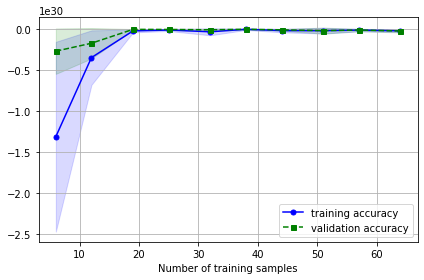

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator= gs.best_estimator_, 
    X= X_std, 
    y = Y, 
    train_sizes=np.arange(0.1,1.1,0.1), 
    cv= 5, 
    scoring='r2', 
    n_jobs= - -1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


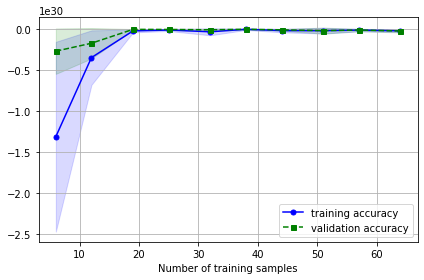

In [18]:

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#### Notes:

* For each of the folds, show learning curves (along epochs) of the cost and correlation from the training and test(or validation) data where applicable

* Draw plots using matplotlib

* Please discuss each of your results with at least few lines of text